In [1]:
import tweepy as tw
import pandas as pd
from datetime import datetime, timedelta
import time
from alive_progress import alive_bar
import os.path
import schedule

In [3]:
tweets_df=pd.read_csv('D:\protest_tracker_10_01_2022\static\csv\HealthProtest_Data.csv',index_col=0)

In [4]:
tweets_df

,Tweet Id,Text,location,Media,TweetUrl,Hashtags,Retweets Counts,Like Counts,clean_text,clean_text1,...,Protest-Size,GPE,LOC,NEW_DATE,name,geo_country,Country,Country_Code,sentiment,topics
Datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-16 14:46:04,1482725846964060163,@sschweb1 Seen this in Vancouver (mbmch) in a ...,"Vancouver, British Columbia",[],https://twitter.com/user/status/14827258469640...,Doctor Protest,0,0,seen this in vancouver mbmch in a car carava...,seen vancouv mbmch car caravan protest main st...,...,NaN,['vancouver'],NaN,['about six months ago'],NaN,"Vancouver, District of North Vancouver, Metro ...",Canada,CA,NEGATIVE,"{0: 'caravan ago vancouv open seen', 1: 'carav..."
2022-01-15 06:45:08,1482242430657495042,@MeritUnity @PMOIndia @MoHFW_INDIA @mansukhman...,NaN,[],https://twitter.com/user/status/14822424306574...,Doctor Protest,2,2,india gadkari ...,india gadkari,...,NaN,['india'],NaN,NaN,NaN,India,India,IN,POSITIVE,"{0: 'gadkari india', 1: 'gadkari india', 2: 'i..."
2022-01-15 02:27:02,1482177477762236419,@Drsuryadnb @NBEMS_INDIA @FordaIndia @AIIMSRDA...,NaN,[],https://twitter.com/user/status/14821774777622...,Doctor Protest,3,3,india cnbc ...,india cnbc,...,NaN,['india'],NaN,NaN,NaN,India,India,IN,POSITIVE,NaN
2022-01-13 15:12:22,1481645301341765632,@dentodontics @Indian__doctor @sushant_says @A...,NaN,[],https://twitter.com/user/status/14816453013417...,Doctor Protest,2,2,doctor says india ghonia ...,doctor say india ghonia,...,NaN,['india'],NaN,NaN,doctor,India,India,IN,NEGATIVE,"{0: 'india doctor ghonia say', 1: 'india ghoni..."
2022-01-13 02:12:46,1481449109261524995,@Indian__doctor @mansukhmandviya @PMOIndia @dr...,NaN,[],https://twitter.com/user/status/14814491092615...,Doctor Protest,2,2,doctor alokmittal india ...,doctor alokmitt india,...,NaN,['india'],NaN,NaN,doctor,India,India,IN,POSITIVE,"{0: 'india alokmitt doctor', 1: 'india doctor ..."
2022-01-13 02:12:22,1481449008497565696,@Rohitan28100465 @Indian__doctor @ProfSomashek...,NaN,[],https://twitter.com/user/status/14814490084975...,Doctor Protest,3,3,doctor alokmittal india ...,doctor alokmitt india,...,NaN,['india'],NaN,NaN,doctor,India,India,IN,POSITIVE,"{0: 'india alokmitt doctor', 1: 'india doctor ..."
2022-01-12 20:51:34,1481368276349378566,@doctorsaz @doctor_oxford For the same reason ...,The shadows of the capital,[],https://twitter.com/user/status/14813682763493...,Doctor Protest,0,2,oxford for the same reason that the people wh...,oxford reason peopl attack doctor us protest tr,...,NaN,['us'],NaN,NaN,doctor,United States,United States,US,NEGATIVE,"{0: 'oxford attack tr reason doctor', 1: 'peop..."
2022-01-12 17:55:16,1481323909119377408,@vivEkdEvda2223 @poojabeditweets @CMOMaharasht...,NaN,[],https://twitter.com/user/status/14813239091193...,Doctor Protest,0,0,india former ntag...,india former ntag,...,NaN,['india'],NaN,NaN,NaN,India,India,IN,POSITIVE,"{0: 'india ntag', 1: 'india ntag', 2: 'ntag in..."
2022-01-12 09:25:02,1481195504734474243,"India lost one more doctor, a bright student, ...",NaN,[],https://twitter.com/user/status/14811955047344...,Doctor Protest,1,1,india lost one more doctor a bright student ...,india lost one doctor bright student alway smi...,...,NaN,['india'],NaN,NaN,doctor,India,India,IN,NEGATIVE,"{0: 'bright alway lost student india', 1: 'ind..."


In [7]:
print(tweets_df[["GPE",'geo_country','Country','Country_Code']].head(5))

                               GPE  \
Datetime                             
2022-01-16 14:46:04  ['vancouver']   
2022-01-15 06:45:08      ['india']   
2022-01-15 02:27:02      ['india']   
2022-01-13 15:12:22      ['india']   
2022-01-13 02:12:46      ['india']   

                                                           geo_country  \
Datetime                                                                 
2022-01-16 14:46:04  Vancouver, District of North Vancouver, Metro ...   
2022-01-15 06:45:08                                              India   
2022-01-15 02:27:02                                              India   
2022-01-13 15:12:22                                              India   
2022-01-13 02:12:46                                              India   

                    Country Country_Code  
Datetime                                  
2022-01-16 14:46:04  Canada           CA  
2022-01-15 06:45:08   India           IN  
2022-01-15 02:27:02   India           IN  

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

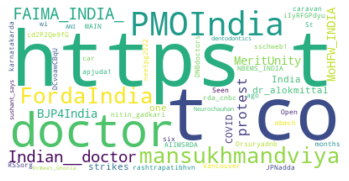

In [10]:
tweet_string = " ".join(tweet for tweet in tweets_df['Text'])
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=50, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

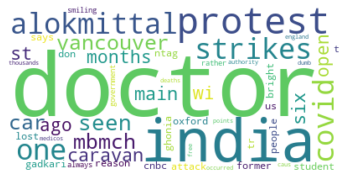

In [12]:
tweet_string = " ".join(tweet for tweet in tweets_df['clean_text'])
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=50, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

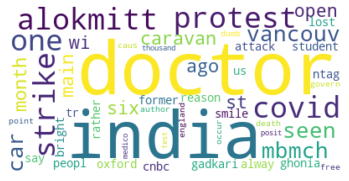

In [11]:
tweet_string = " ".join(tweet for tweet in tweets_df['clean_text1'])
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=50, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

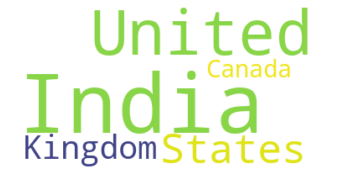

In [13]:
tweet_string = " ".join(tweet for tweet in tweets_df['Country'])
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=50, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

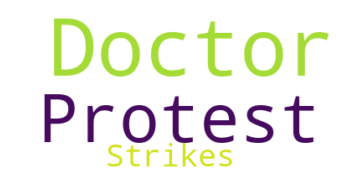

In [16]:
tweet_string = " ".join(tweet for tweet in tweets_df['Hashtags'])
# create the wordcloud
tweet_wordcloud = WordCloud(background_color="white", 
                              max_words=50, 
                             ).generate(tweet_string)

# view the wordcloud
plt.imshow(tweet_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
print(tweets_df['clean_text'].tail(10))

Datetime
2022-01-13 15:12:22                     doctor  says  india   ghonia ...
2022-01-13 02:12:46                       doctor  alokmittal  india  ...
2022-01-13 02:12:22                        doctor  alokmittal  india ...
2022-01-12 20:51:34     oxford for the same reason that the people wh...
2022-01-12 17:55:16                                 india former ntag...
2022-01-12 09:25:02    india lost one more doctor  a bright student  ...
2022-01-15 21:07:13    so  a free dumb doctor in england points out t...
2022-01-11 10:44:22    thousands of doctors medicos test covid positi...
2022-01-10 18:24:55    who do guys on strikes  that is more than a ju...
2022-01-10 00:20:37    white goy strikes again  romania  poland  russ...
Name: clean_text, dtype: object


<AxesSubplot:ylabel='None'>

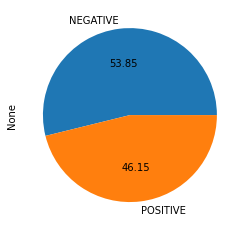

In [21]:
tweets_df.groupby('sentiment').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:xlabel='sentiment'>

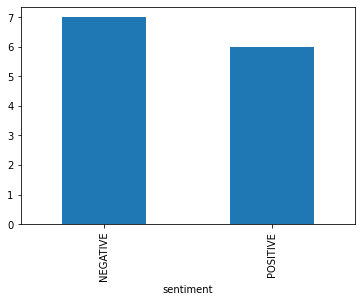

In [22]:
tweets_df.groupby('sentiment').size().plot.bar()